# Melanoma Detection Assignment
# Author : Ashok Yadav

# Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Building a simple CNN model

In [3]:
#Before start, Checking GPU 
import tensorflow as tf 
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

  print(tf. __version__)

Wed Oct 12 15:11:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### **Task 1: Reading the data**

Importing all the important libraries

In [4]:
# Importing the required libraries
import pathlib
import os
import PIL

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator


You are expected to load the data in the Colab environment by mounting the Google Drive. This will allow you to access the files from Google drive through Colab. 

Steps:
1. Upload the dataset in your Google Drive in a separate folder. Avoid spaces in the name of the folder or the zip file.
2. Mount the Google Drive using the code given below.
3. Unzip the file to access images.
4. Check the path for the datasets - train and test.


Note: The code is commented for you to learn and then make edits to execute the command.

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
## If you are using the data by mounting the google drive, use the following:
# I have uploaded CNN_assigment on my google drive,Downloading it for Golab
#!!gdown --id 1_1BDnCJN_aLKIQ7B6AnBehbwA8_w0bcc
#!mkdir -p /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage
#!mv CNN_assignment_new.zip  /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/.
#!unzip /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNN_assignment_new.zip -d /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/.
# Your GDrive Directory
#Rename the Images directory without spaces
#!ls /content/gdrive/MyDrive
#!mv "/content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/Skin cancer ISIC The International Skin Imaging Collaboration" "/content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages"


Few commands have been executed to store the file from Google Drive to Golab,mount etc.

Check the path mentioned in the output: `Skin cancer ISIC The International Skin Imaging Collaboration`

Provide the path for train and test images using pathlib library.

```
# This is formatted as code
```


**Data reading/data understanding** 

In [17]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [18]:
#Check whether the data has been extracted successfully.
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)
#Total number of images 
print("total images "+str(image_count_train+image_count_test))

2239
118
total images 2357


Check whether the data has been extracted successfully.

#### **Task 2: Loading the images using keras.preprocessing**

The images are still not loaded in the Colab environment. We have extracted them from the zip file. Now, you are expected to load them in the Colab notebook using the `preprocessing` attribute.

Let's load these images off disk using the helpful image_dataset_from_directory utility. You can refer to the following [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) to know more about the function. You can even refer to the additional notebooks on the page to check how the variables are defined.



Defining the parameters for the loader:
**Create a DataSet**

In [19]:
batch_size = 32
img_height = 180
img_width = 180

Divide the training set into 2 parts: 
*   80% for training 
*   20% for validation



In [20]:
SEED=123
np.random.seed(SEED)

In [21]:
## Write your code for train dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [22]:
## Write your code for validation dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [23]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [24]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the 'class_names' attribute associated with the training and validation datasets. 
# These correspond to the directory names in alphabetical order.
#class_names = train_ds.class_names, Total 9 classed successfully listed
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Task 3: Visualize the data**

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

Write the code to visualize one instance of all the nine classes present in the dataset

In [25]:
import matplotlib.pyplot as plt
### Your code goes here; you can use either training or validation data to visualize the images.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
#Tensor for file ,size etc
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


#### Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [27]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Task 4: Create the model**
Create a CNN model, which can accurately detect 9 classes present in the dataset. 


*   Note: The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`. Use `layers.experimental.preprocessing.Rescaling` for this purpose.

In [28]:
preprocessing_layer = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
]

In [60]:
total_classes = 9


## Your code goes here
## You should also include dropouts to tackle with overfitting. (compulsory)


model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same',input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(pool_size=(2, 2), strides=1),
  layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
  layers.MaxPooling2D(),
  #layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'),
  #layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(1024, activation='relu'),
  layers.Dense(total_classes,activation='softmax')
])

#### **Question**: 
Explain the following elements associated with the problem:
1.   Selection of stride value (Reason for using a high/low value)
2.   Padding strategy used (Same/Valid)

**Answers: Stride Value**
I have selected stride 1 ,default as I want to work with more feature.
i.e. 
stride=1 in usual convolutions and preserve the spatial size with padding, and use stride=2 when you want to downsample the image

1.   Low Stride : -->
more features are learned because more data is extracted, which also leads to larger output layers. On the contrary, as stride is increased, 

2.   High Stride : -->
this leads to  limited feature extraction and smaller output layer dimensions.



**Padding strategy used :-->**
To maintain the dimension of output as in input , we have used padding "Same" .

#### **Task 5: Compile the model**
Choose an appropirate optimiser and loss function for model training.

In [61]:
### Choose an appropirate optimiser and loss function ,selected based on study and whitepapaper
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
# View the summary of all layers
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 179, 179, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 179, 179, 64)      18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 89, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 89, 89, 128)      

#### Train the model

In [63]:
# The model needs to be trained for 20 epochs
# The model needs to be trained for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 133ms/step - loss: 2.2440 - accuracy: 0.2316 - val_loss: 1.8759 - val_accuracy: 0.3087
Epoch 2/20
56/56 [==============================] - 7s 130ms/step - loss: 1.8538 - accuracy: 0.2952 - val_loss: 2.0383 - val_accuracy: 0.2685
Epoch 3/20
56/56 [==============================] - 7s 131ms/step - loss: 1.6971 - accuracy: 0.3806 - val_loss: 1.5994 - val_accuracy: 0.4519
Epoch 4/20
56/56 [==============================] - 7s 131ms/step - loss: 1.5560 - accuracy: 0.4509 - val_loss: 1.5315 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 7s 132ms/step - loss: 1.5020 - accuracy: 0.4788 - val_loss: 1.4827 - val_accuracy: 0.5034
Epoch 6/20
56/56 [==============================] - 7s 132ms/step - loss: 1.4507 - accuracy: 0.4927 - val_loss: 1.4440 - val_accuracy: 0.5101
Epoch 7/20
56/56 [==============================] - 7s 132ms/step - loss: 1.3731 - accuracy: 0.5179 - val_loss: 1.3861 - val_accuracy: 0.5190
Epoch 

#### Visualizing training results

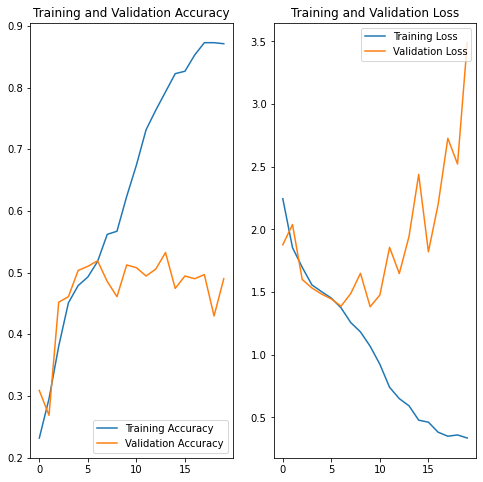

In [64]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
#Model Overfit or Underfit?
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 44ms/step - loss: 3.4890 - accuracy: 0.4899
Accuracy:  0.9107142686843872
Validation Accuracy:  0.4899328947067261
Loss:  0.23652306199073792
Validation Loss 3.4889605045318604


#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit

**Model has overfitted **based on Accuracy and validation Accuracy and by seeing the training loss and validation loss. Validation loss is constantly decresing but training loss is not.**It implies that model has memorized the training data patterns.**



## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [66]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times

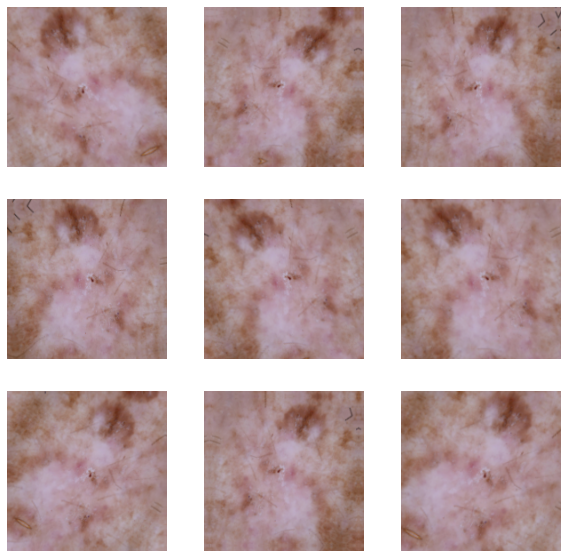

In [67]:
# Visualizing how the augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### **Task 6: Create, compile and train the model**

Model Definition

In [68]:
## Your code goes here
## You should also include dropouts to tackle with overfitting. (compulsory)
total_classes = 9


dropout_aug_model =  Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same',input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(pool_size=(2, 2), strides=1),
  layers.Dropout(0.2),
  layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
  layers.MaxPooling2D(),
  #dropouts
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  #dropouts
  layers.Dropout(0.3),
  layers.Dense(1024, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(total_classes, activation='softmax')
])



Compiling the model

In [69]:
## Your code goes here
dropout_aug_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical

In [71]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=5, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

In [72]:
dropout_aug_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 179, 179, 32)     0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 179, 179, 32)      0         
                                                                 
 conv2d_44 (Conv2D)          (None, 179, 179, 64)      18496     
                                                     

Training the model

In [73]:
# Note: Train your model for 20 epochs
## Your code goes here


epochs = 20


history = dropout_aug_model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs,callbacks=[learning_rate_reduction])

Epoch 1/20
56/56 [==============================] - 9s 147ms/step - loss: 3.3319 - accuracy: 0.1914 - val_loss: 2.0527 - val_accuracy: 0.2617 - lr: 0.0010
Epoch 2/20
56/56 [==============================] - 8s 146ms/step - loss: 1.9598 - accuracy: 0.2695 - val_loss: 1.8594 - val_accuracy: 0.3356 - lr: 0.0010
Epoch 3/20
56/56 [==============================] - 8s 145ms/step - loss: 1.8618 - accuracy: 0.2896 - val_loss: 1.7594 - val_accuracy: 0.4004 - lr: 0.0010
Epoch 4/20
56/56 [==============================] - 8s 145ms/step - loss: 1.6943 - accuracy: 0.4035 - val_loss: 1.7151 - val_accuracy: 0.3937 - lr: 0.0010
Epoch 5/20
56/56 [==============================] - 8s 145ms/step - loss: 1.6143 - accuracy: 0.4224 - val_loss: 1.6552 - val_accuracy: 0.4251 - lr: 0.0010
Epoch 6/20
56/56 [==============================] - 8s 145ms/step - loss: 1.6157 - accuracy: 0.4392 - val_loss: 1.5293 - val_accuracy: 0.4899 - lr: 0.0010
Epoch 7/20
56/56 [==============================] - 8s 147ms/step - lo

#### Visualizing the results

<built-in method keys of dict object at 0x7f131c3ae280> :


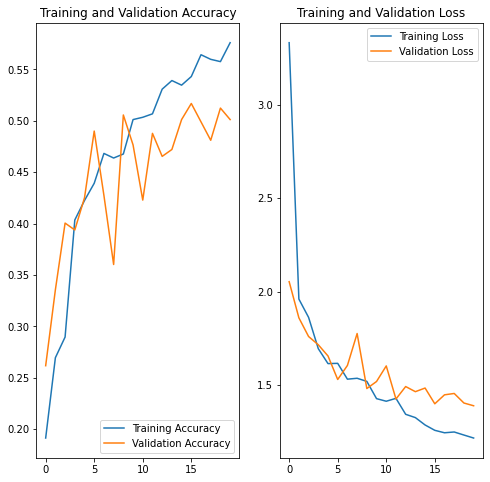

In [75]:
acc = history.history['accuracy']
print(history.history.keys, ":")
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [76]:
# Plotting Model accuracy

def plot_history(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_history(history)

In [77]:
#Model Overfit or Underfit?
loss, accuracy = dropout_aug_model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = dropout_aug_model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 39ms/step - loss: 1.3887 - accuracy: 0.5011
Accuracy:  0.5485491156578064
Validation Accuracy:  0.501118540763855
Loss:  1.2386304140090942
Validation Loss 1.3887240886688232


#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Answers : -->** </br>
Visualizing the model performance in "Augmentation and dropout inclusion "implies that there **Overfitting got reduced to someextant** . Accuracy & validation accuracy are following similiar patterns . Loss for both training and validation are following the similiar pattern in above graph. 

Accuracy:  0.5485491156578064
Validation Accuracy:  0.501118540763855

## Distribution in the dataset

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<br>

#### **Task 7: Find the distribution of classes in the training dataset.**

In [78]:
## Your code goes here.
import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

<Figure size 720x720 with 0 Axes>

#### **Questions:**  
 - Which class has the least number of samples? <br/>
**Answer** -->** seborrheic keratosis**
 - Which classes dominate the data in terms proportionate number of samples?<br/>
**Answer** -->** Pigmented benign keratosis dominates the data**


#### **Task 8: Rectifying the class imbalance**
You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [79]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [81]:
# Provide the path for the training dataset
path_to_training_dataset="/content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
    ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1439B19D10>: 100%|██████████| 500/500 [00:17<00:00, 29.07 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F14A2AC3E10>: 100%|██████████| 500/500 [00:20<00:00, 24.09 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F13B052B2D0>: 100%|██████████| 500/500 [00:19<00:00, 25.76 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F142EE6AF90>: 100%|██████████| 500/500 [01:23<00:00,  6.01 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F13B072CC90>: 100%|██████████| 500/500 [01:22<00:00,  6.03 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F131C107950>: 100%|██████████| 500/500 [00:17<00:00, 28.63 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F131C453F50>: 100%|██████████| 500/500 [00:40<00:00, 12.21 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F142EECD8D0>: 100%|██████████| 500/500 [00:21<00:00, 23.18 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F13CA31A290>: 100%|██████████| 500/500 [00:21<00:00, 23.80 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [82]:
# Count of images under each class after addition
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [83]:
from glob import glob

In [84]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029781.jpg_74ec68bc-3e2c-4eb3-adae-01fce4b77868.jpg',
 '/content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027829.jpg_f8149eec-ffe4-47b6-8d72-c59357d024de.jpg',
 '/content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027950.jpg_7b6a0c5b-f323-4985-a2cd-48e76362feeb.jpg',
 '/content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027172.jpg_814add4a-1f91-4b82-a536-d3afc112006e.jpg',
 '/content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030133.jpg_37999ead-ce71-4a83-89f0-8ec420420cce.jpg',
 '/content/gdrive/MyDrive/cnnmodelcancerimages/CNN

In [85]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [86]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [87]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [88]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### **Task 9: Repeating the steps for balanced augmented data**

In [90]:
batch_size = 32
img_height = 180
img_width = 180

**Create a training dataset**

In [91]:
# Provide the path here
#data_dir_train="/content/gdrive/MyDrive/melanomadatasetassignment/CNNImages/Train/"
data_dir_train="/content/gdrive/MyDrive/cnnmodelcancerimages/CNNTargetImage/CNNImages/Train/"

# Provide the subset value here
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Create a validation dataset**

In [92]:
# Provide the subset value here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


**Create your model (make sure to include normalization)**

In [94]:
## Your code goes here
## You should also include dropouts to tackle with overfitting. (compulsory)
#dropouts and BatchNormalization both included to tackle overfitting
total_classes=9
modelfinal =  Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same',input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(pool_size=(2, 2), strides=1),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(1024, activation='relu'),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(total_classes, activation='softmax')
])




In [95]:
modelfinal.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 179, 179, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 179, 179, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_51 (Conv2D)          (None, 179, 179, 64)    

**Compile your model (Choose optimizer and loss function appropriately)**

Optimizer : ReduceLROnPlateau reads a metrics quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [96]:
## Your code goes here
modelfinal.compile("adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train your model**

In [97]:
# Note: Train your model for 30 epochs
## Your code goes here

epochs = 30

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=5, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

batch_size = 32
history = modelfinal.fit(train_ds,batch_size=32,
  epochs = epochs, verbose = 1, validation_data=val_ds , callbacks=[learning_rate_reduction])

Epoch 1/30
169/169 [==============================] - 55s 299ms/step - loss: 2.0250 - accuracy: 0.3440 - val_loss: 2.5668 - val_accuracy: 0.1128 - lr: 0.0010
Epoch 2/30
169/169 [==============================] - 46s 269ms/step - loss: 1.6079 - accuracy: 0.4290 - val_loss: 2.7044 - val_accuracy: 0.1359 - lr: 0.0010
Epoch 3/30
169/169 [==============================] - 47s 273ms/step - loss: 1.4405 - accuracy: 0.4779 - val_loss: 1.8017 - val_accuracy: 0.4068 - lr: 0.0010
Epoch 4/30
169/169 [==============================] - 47s 272ms/step - loss: 1.3410 - accuracy: 0.5063 - val_loss: 1.8892 - val_accuracy: 0.3756 - lr: 0.0010
Epoch 5/30
169/169 [==============================] - 47s 271ms/step - loss: 1.2385 - accuracy: 0.5351 - val_loss: 2.1836 - val_accuracy: 0.3252 - lr: 0.0010
Epoch 6/30
169/169 [==============================] - 48s 276ms/step - loss: 1.1857 - accuracy: 0.5586 - val_loss: 2.0173 - val_accuracy: 0.3304 - lr: 0.0010
Epoch 7/30
169/169 [==============================] 

**Visualize the model results**

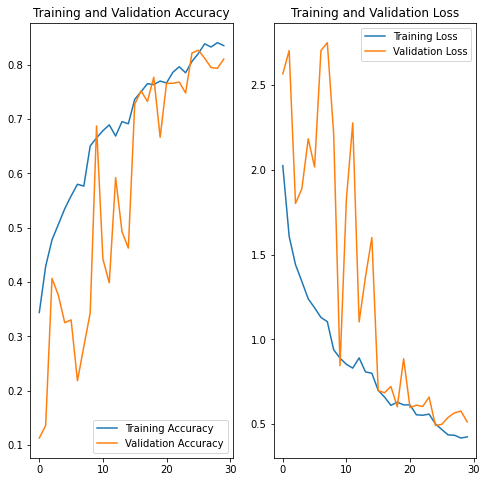

In [98]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [99]:
#Model Overfit or Underfit?
loss, accuracy = modelfinal.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = modelfinal.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 6s 122ms/step - loss: 0.5117 - accuracy: 0.8107
Accuracy:  0.9061572551727295
Validation Accuracy:  0.8106904029846191
Loss:  0.2661694288253784
Validation Loss 0.5117245316505432


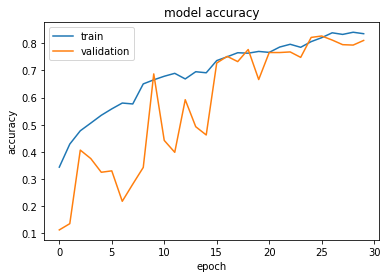

In [100]:
# Plotting Model accuracy

def plot_history(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_history(history)

### **Task 10: Analyzing the results** 


#### **Question:**
- Did you get rid of underfitting/overfitting from the model? 
**Yes , with Augmentation, Dropout and normalization we are able to get rid of underfitting /overfitting.**
- Did class rebalance help in the process?
**Yes**


### **Answers: **


*   Yes  we got rid of underfitting/overfitting upto larger extent afer performing , Dorpout, Normalization and Augmentation .

Accuracy:  0.9061572551727295
Validation Accuracy:  0.8106904029846191
Seems to be ok .

*  Yes class rebalance also helped in process

